In [67]:
import matplotlib.pyplot as plt
import pandas as pd

# Allow importing from parent directory by temporarily moving the CWD up one level
# Very hacky, but there literally isn't a simpler way (in Jupyter)
import sys
sys.path.append("..")
from common import get_dataframe_from_pipeline
outages = get_dataframe_from_pipeline("../pipeline/3.csv.gz")
sys.path.pop()

'..'

### Box plot of distances

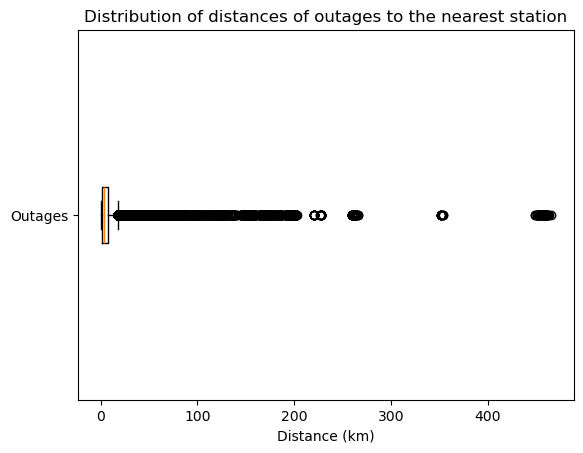

In [68]:
plt.boxplot(outages['outageToSubstationDistance'], vert=False) 
plt.title('Distribution of distances of outages to the nearest station') 
plt.xlabel('Distance (km)') 
plt.yticks([1], ['Outages'])
plt.show()

Zooming in on the box:

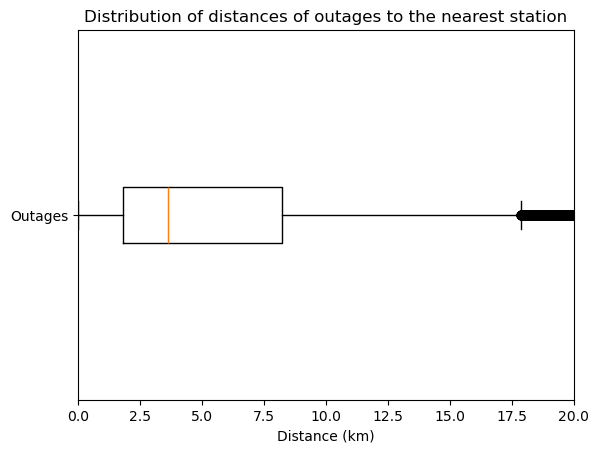

In [69]:
plt.boxplot(outages['outageToSubstationDistance'], vert=False) 
plt.title('Distribution of distances of outages to the nearest station') 
plt.xlabel('Distance (km)') 
plt.yticks([1], ['Outages'])
plt.xlim(0,  20)  # Limit the x-axis to the threshold
plt.show()

### Box plot of timeouts

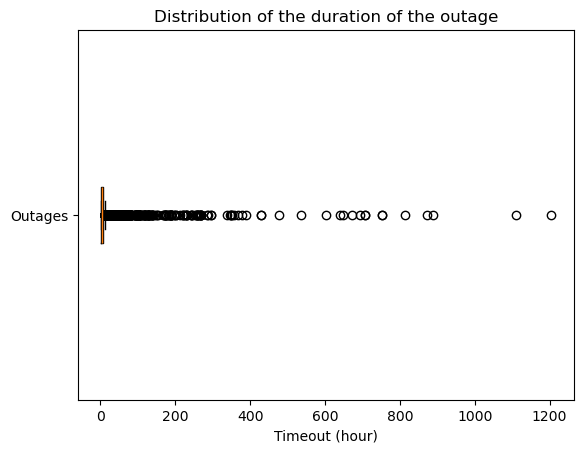

In [70]:
outages['timeOut'] = outages['dateOn'] - outages['dateOff']
outages['timeOut'] = outages['timeOut'].apply(lambda x: x.total_seconds()/3600)
outages['timeOut']
plt.boxplot(outages['timeOut'], vert=False) 
plt.title('Distribution of the duration of the outage') 
plt.xlabel('Timeout (hour)') 
plt.yticks([1], ['Outages'])
plt.show()

Zooming in on the median:

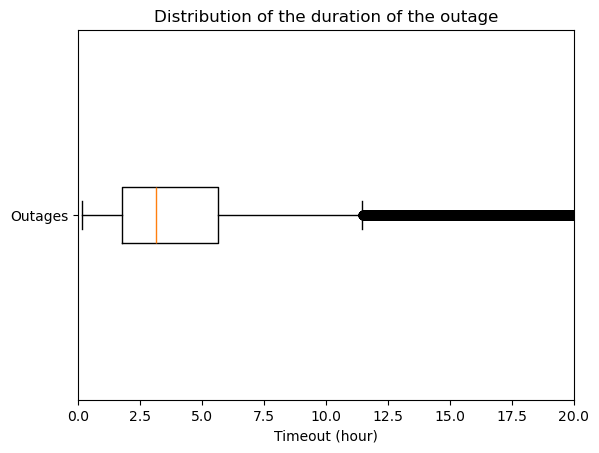

In [75]:
plt.boxplot(outages['timeOut'], vert=False) 
plt.title('Distribution of the duration of the outage') 
plt.xlabel('Timeout (hour)') 
plt.yticks([1], ['Outages'])
plt.xlim(0, 20)  # Limit the x-axis to the threshold
plt.show()

Timeouts for different regions

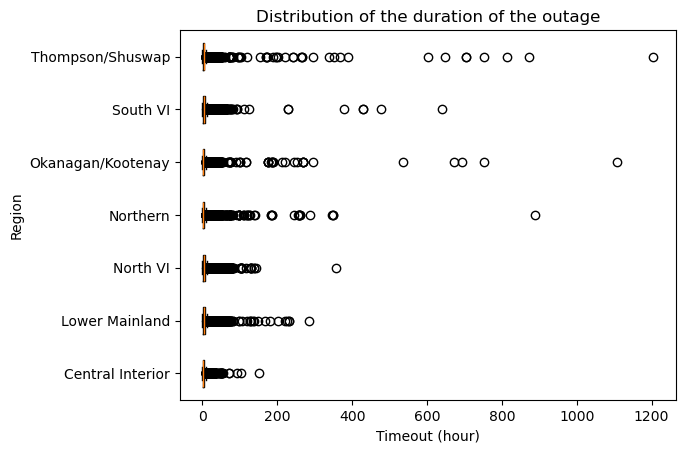

In [72]:
grouped_data = outages.groupby('regionName')['timeOut'].apply(list)
plt.boxplot(grouped_data, vert=False)
plt.title('Distribution of the duration of the outage') 
plt.xlabel('Timeout (hour)') 
plt.ylabel('Region')
plt.yticks(range(1, len(grouped_data) + 1), grouped_data.index)
plt.show()

### Zooming in on the median for each region

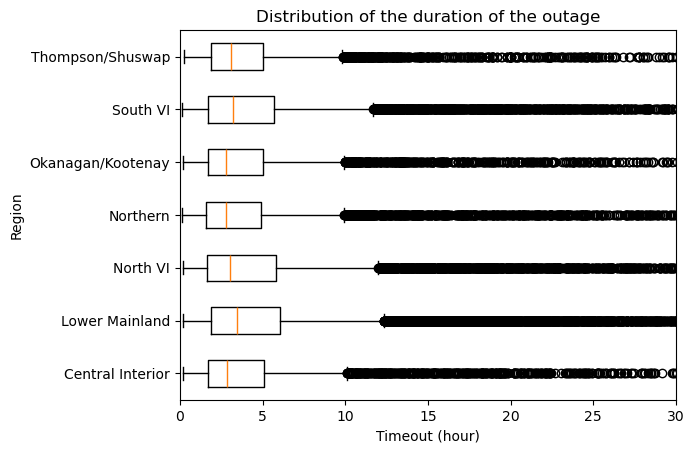

In [73]:
grouped_data = outages.groupby('regionName')['timeOut'].apply(list)
plt.boxplot(grouped_data, vert=False)
plt.title('Distribution of the duration of the outage') 
plt.xlabel('Timeout (hour)') 
plt.ylabel('Region')
plt.yticks(range(1, len(grouped_data) + 1), grouped_data.index)
plt.xlim(0, 30)  # Limit the x-axis to the threshold
plt.show()

very interesting that the median lies all the way there, but there is still so many outages having much larger timeouts.

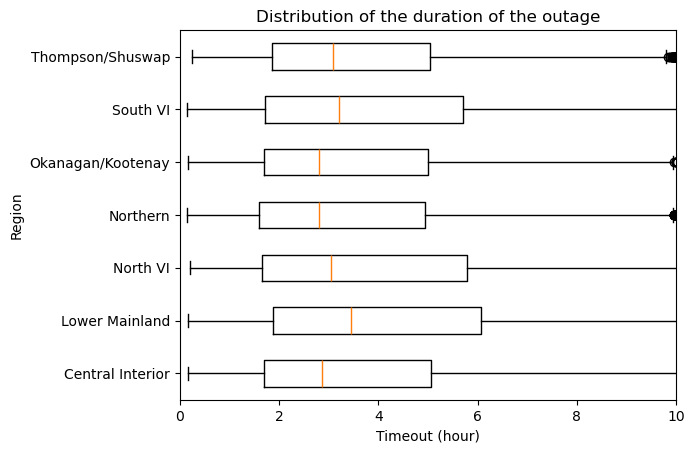

In [74]:
grouped_data = outages.groupby('regionName')['timeOut'].apply(list)
plt.boxplot(grouped_data, vert=False)
plt.title('Distribution of the duration of the outage') 
plt.xlabel('Timeout (hour)') 
plt.ylabel('Region')
plt.yticks(range(1, len(grouped_data) + 1), grouped_data.index)
plt.xlim(0, 10)  # Limit the x-axis to the threshold
plt.show()